<a href="https://colab.research.google.com/github/NurbolotAlt/yolov10/blob/main/yolov10_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!nvidia-smi

Fri Mar 21 16:24:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [15]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [17]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install -q supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 12.3 MB/s eta 0:00:00


In [ ]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 408M
-rw-r--r-- 1 root root  80M May 26  2024 yolov10b.pt
-rw-r--r-- 1 root root 100M May 26  2024 yolov10l.pt
-rw-r--r-- 1 root root  64M May 26  2024 yolov10m.pt
-rw-r--r-- 1 root root  11M May 26  2024 yolov10n.pt
-rw-r--r-- 1 root root  32M May 26  2024 yolov10s.pt
-rw-r--r-- 1 root root 123M May 26  2024 yolov10x.pt


In [20]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install -q roboflow
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("goruntutanima").project("fabricdefect-1exzj")
version = project.version(4)
dataset = version.download("yolov8")

from google.colab import userdata
from roboflow import Roboflow
from IPython.display import Image

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!sed -i '$d' {HOME}/datasets/FabricDefect-4/data.yaml
!sed -i '$d' {HOME}/datasets/FabricDefect-4/data.yaml
!sed -i '$d' {HOME}/datasets/FabricDefect-4/data.yaml
!sed -i '$d' {HOME}/datasets/FabricDefect-4/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {HOME}/datasets/FabricDefect-4/data.yaml

In [ ]:
%cd {HOME}

!yolo task=detect mode=train epochs=50 batch=32 plots=True \
model={HOME}/weights/yolov10n.pt \
data={HOME}/datasets/FabricDefect-4/data.yaml

/content
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 567, in entrypoint
    model = YOLOv10(model)
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/models/yolov10/model.py", line 14, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 141, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 230, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 807, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
         

In [ ]:
!ls {HOME}/runs/detect/train/

ls: cannot access '/content/runs/detect/train/': No such file or directory


/content


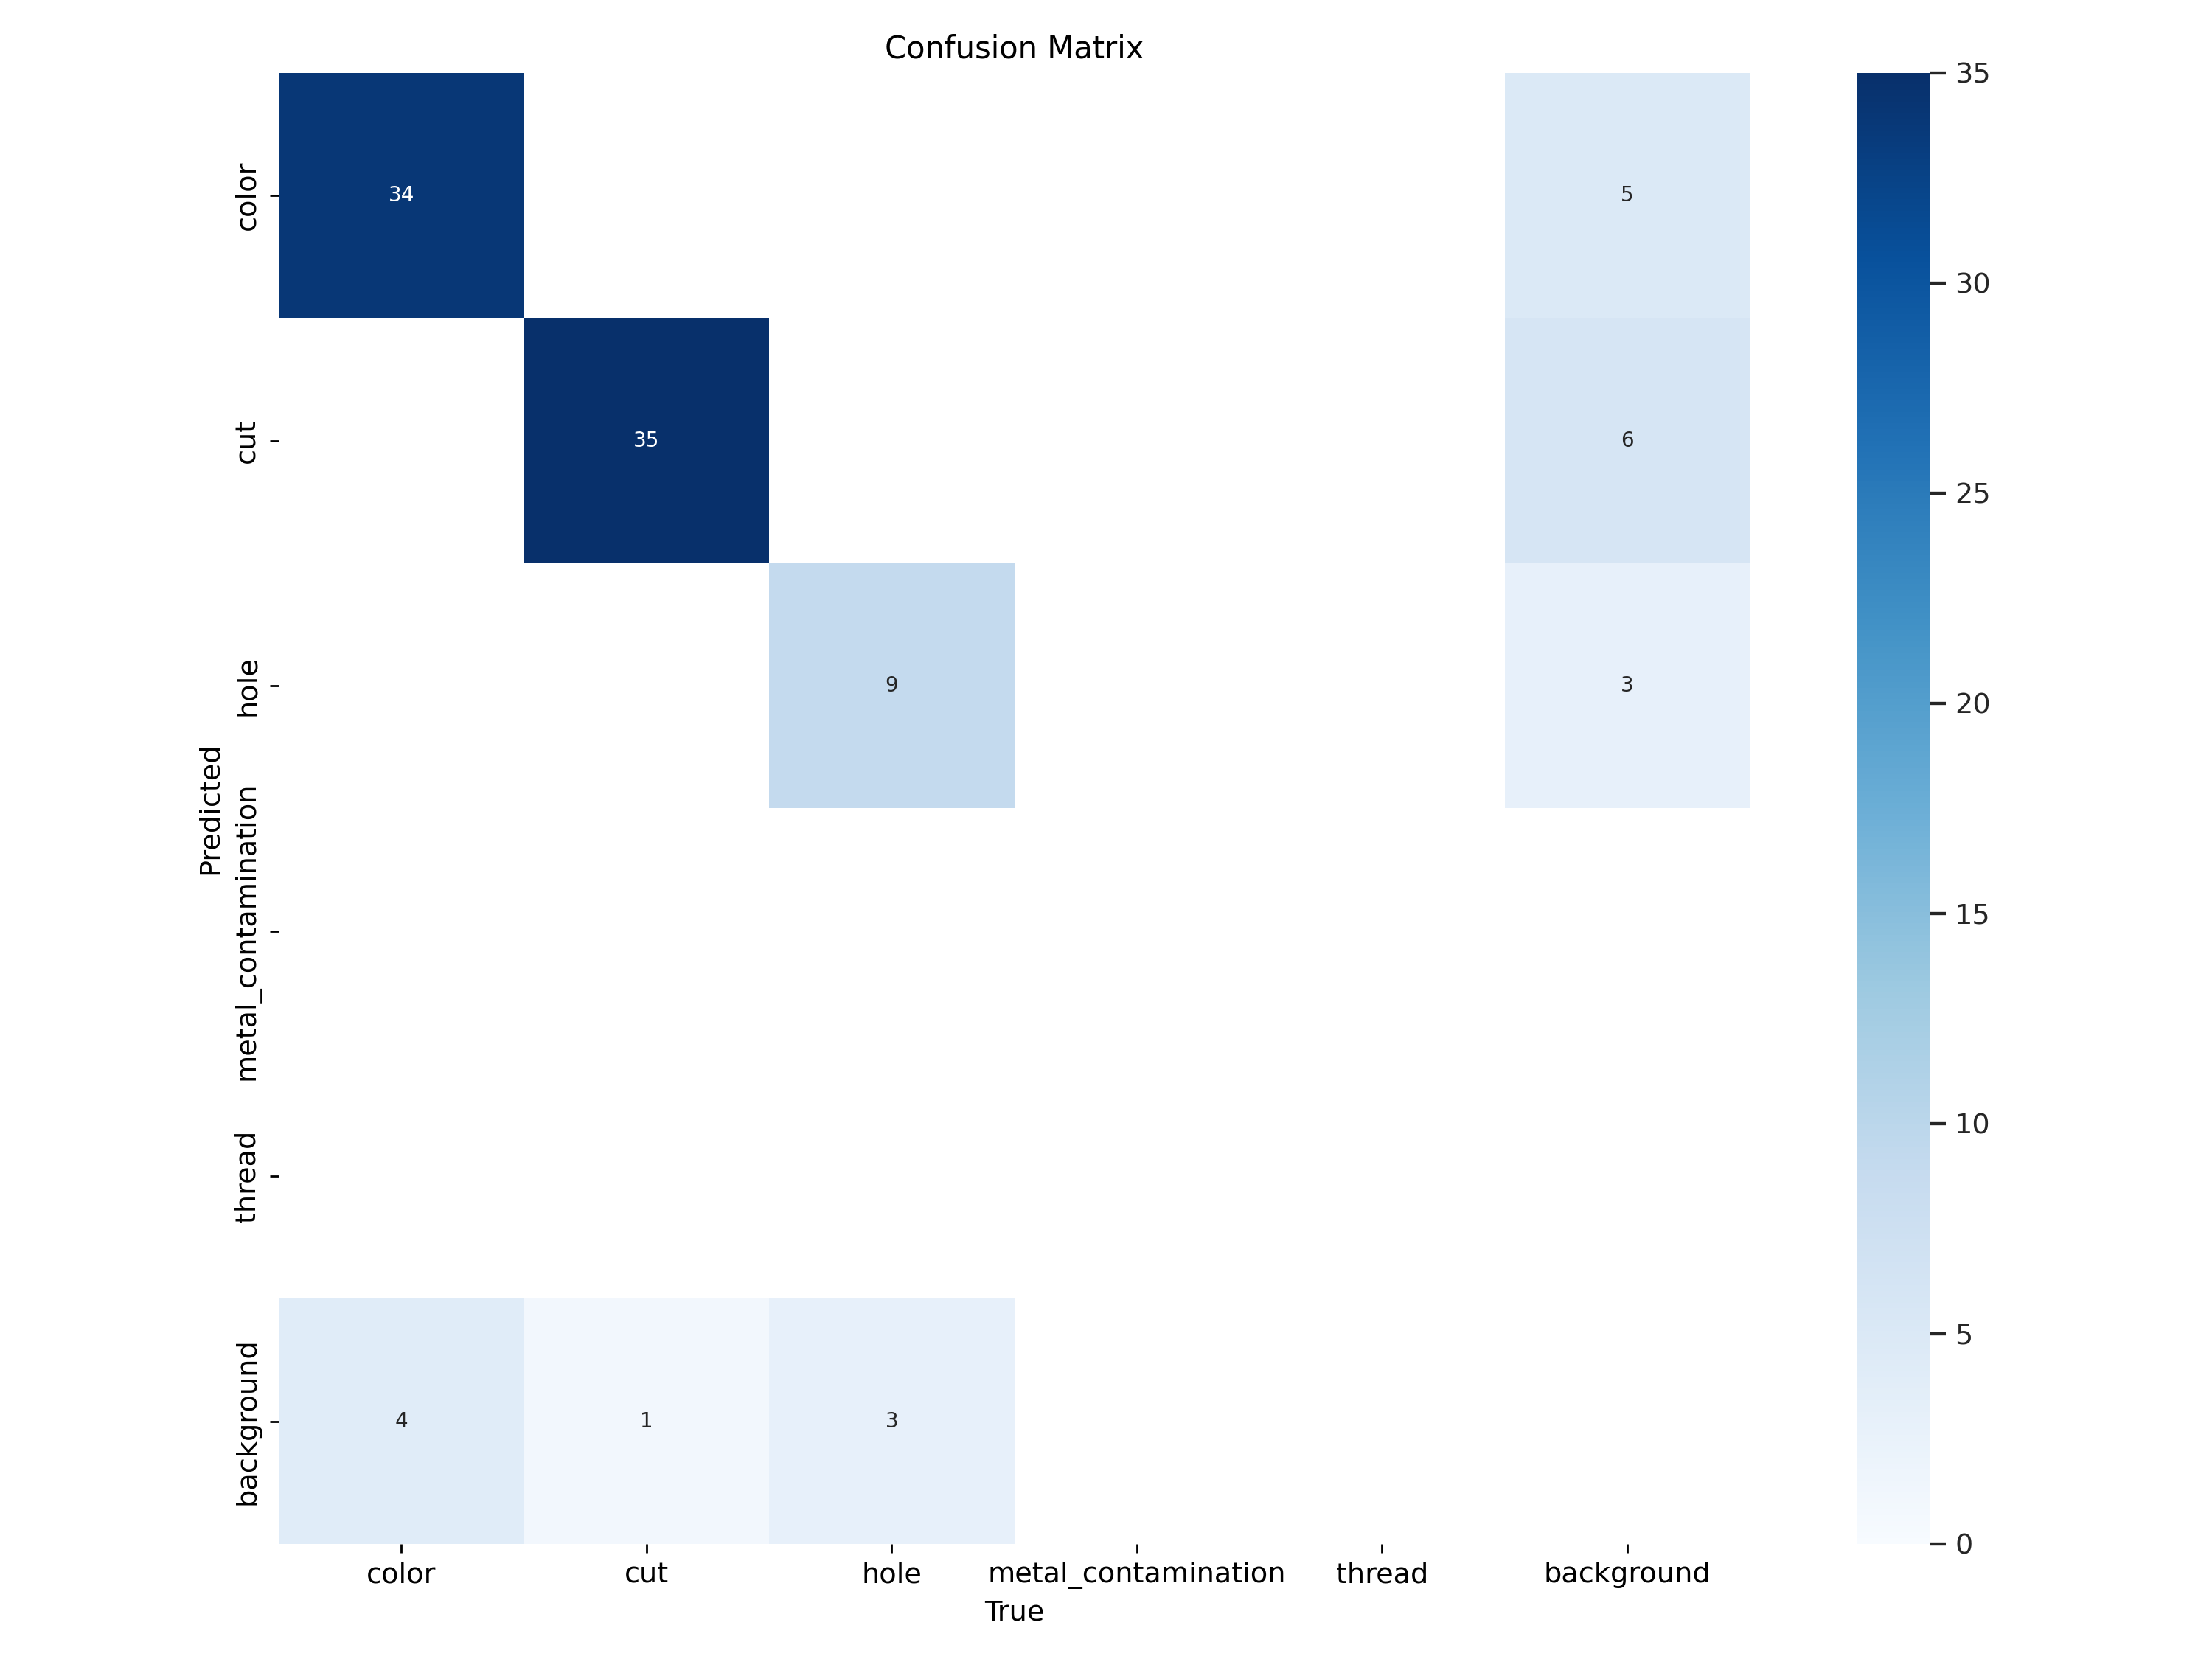

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


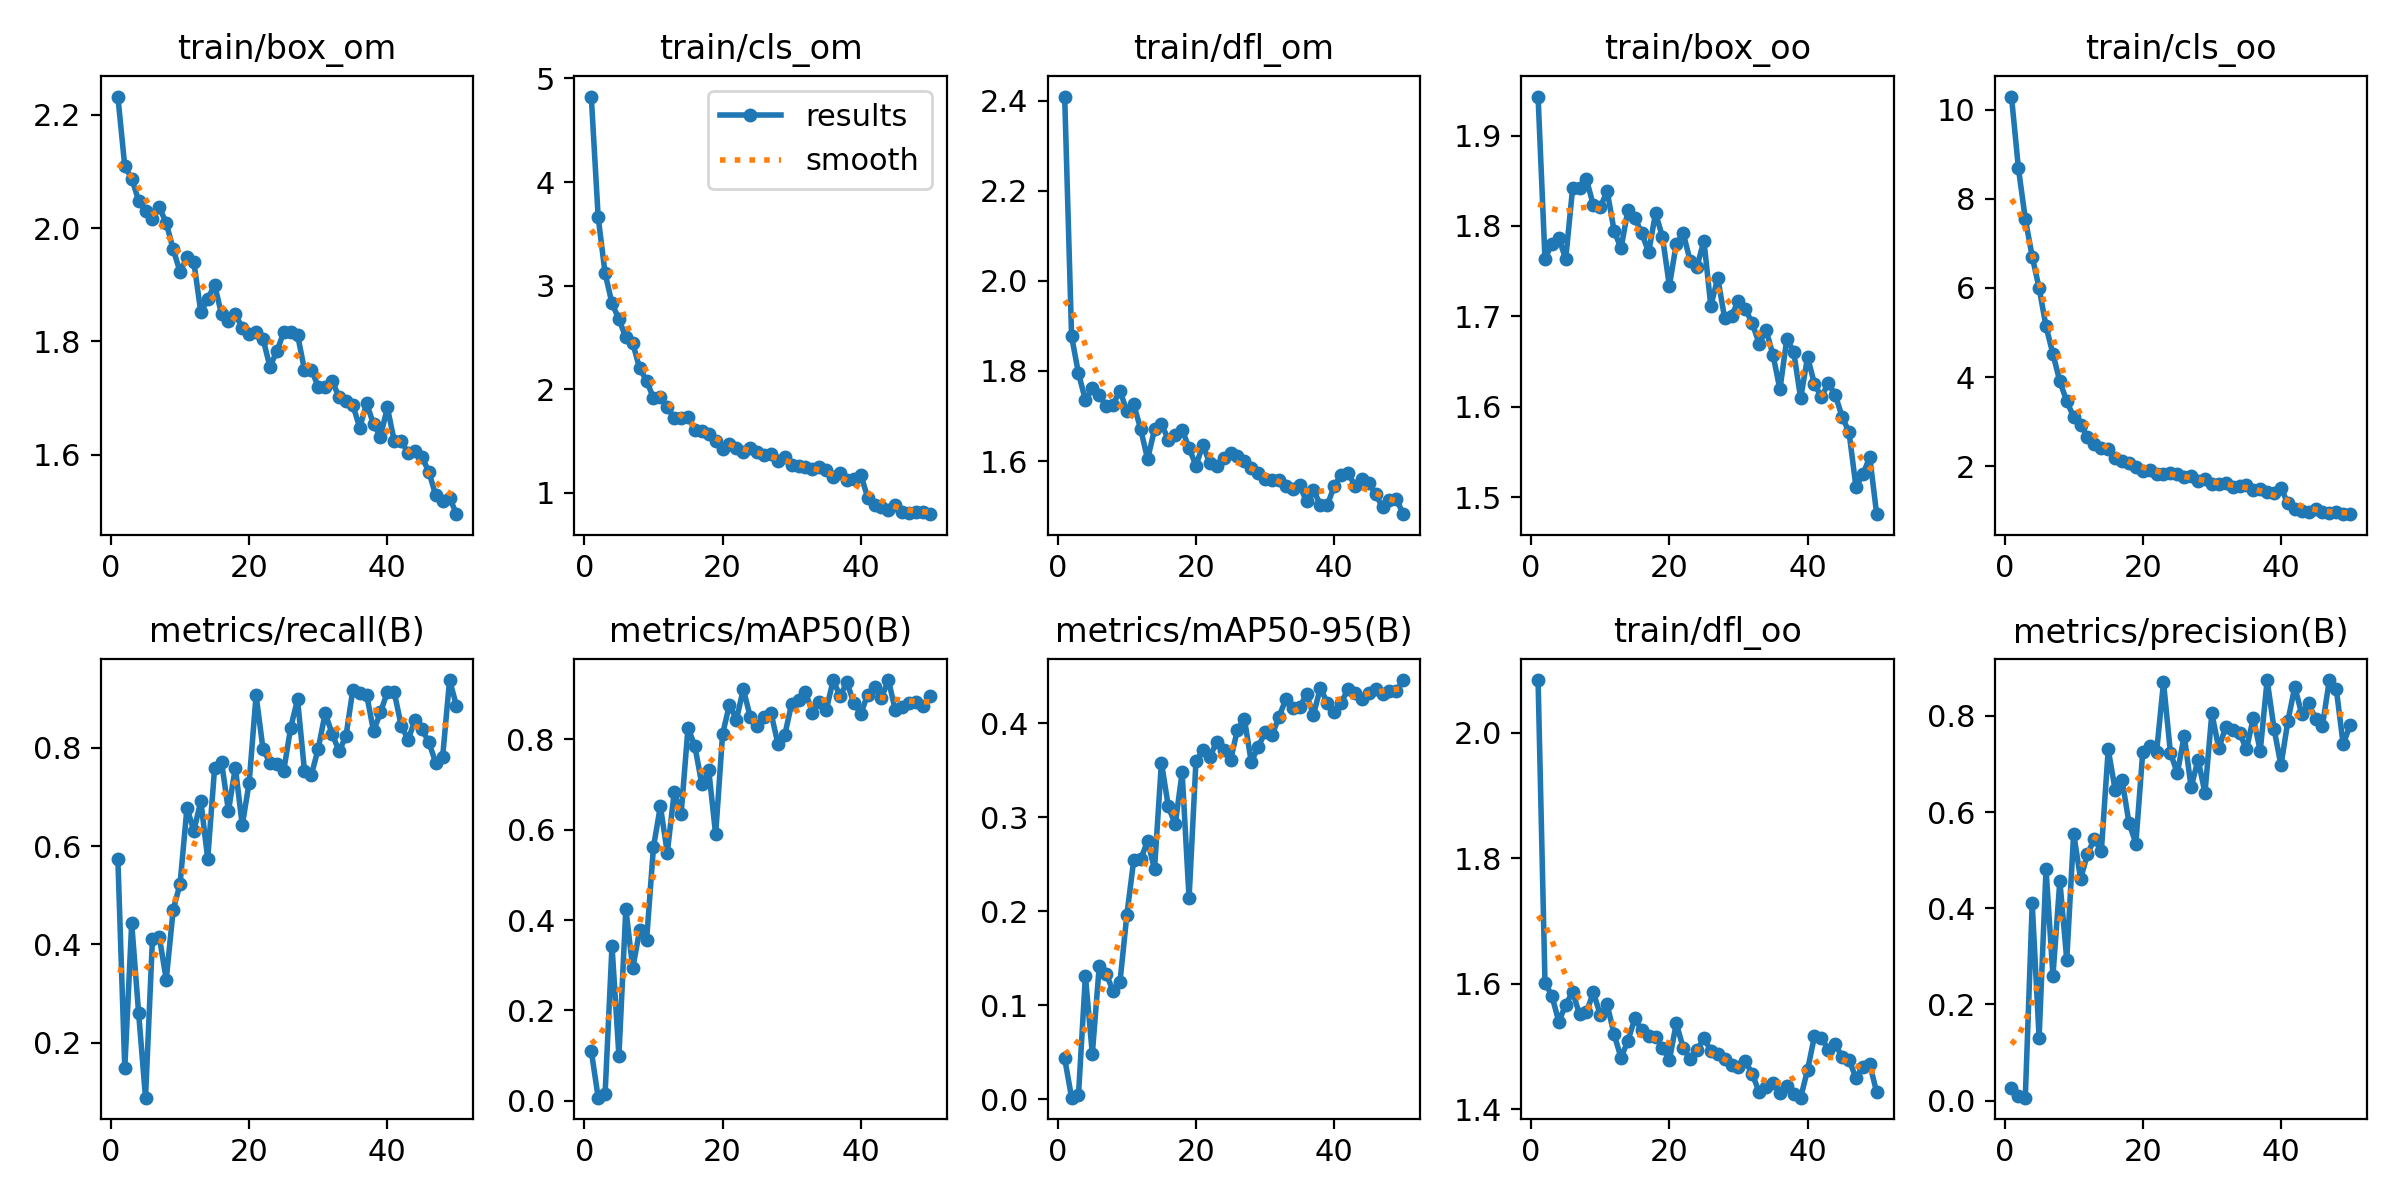

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
from ultralytics import YOLOv10
import supervision as sv

model = YOLOv10(f'{HOME}/runs/detect/train/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{HOME}/datasets/FabricDefect-4/valid/images",
    annotations_directory_path=f"{HOME}/datasets/FabricDefect-4/valid/labels",
    data_yaml_path=f"{HOME}/datasets/FabricDefect-4/data.yaml"
)

bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.



0: 640x640 1 cut, 21.1ms
Speed: 2.5ms preprocess, 21.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


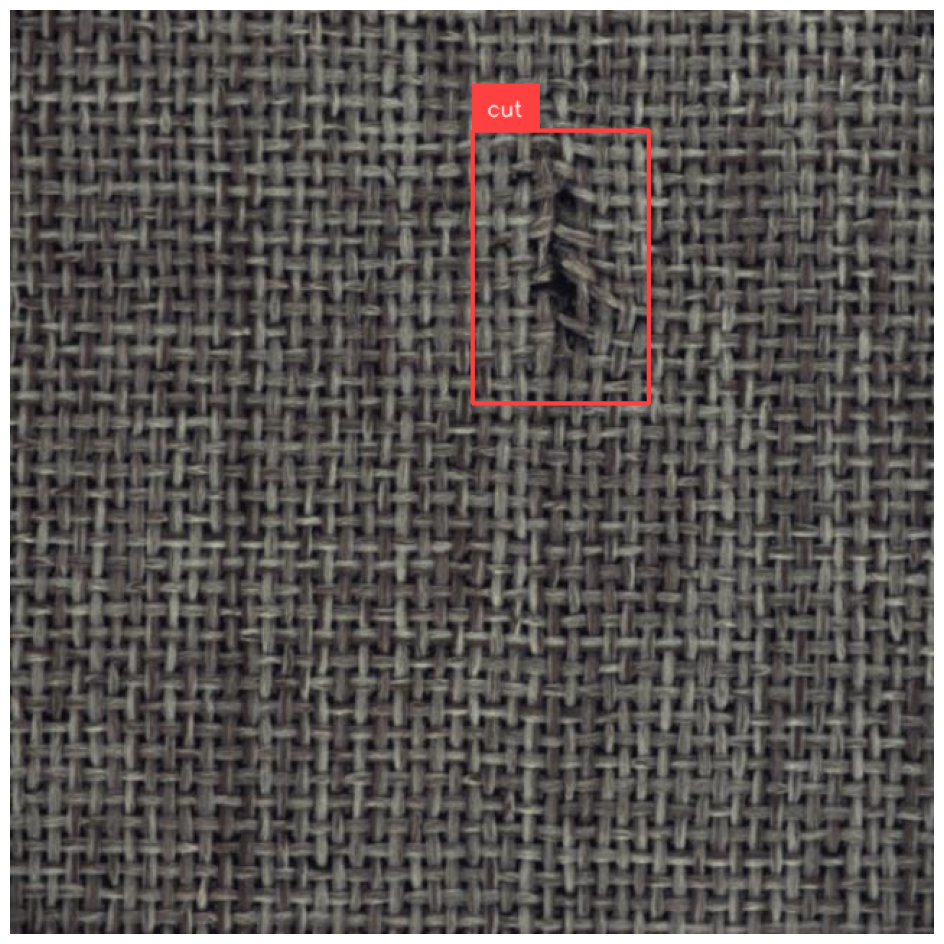

In [ ]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.2)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [ ]:
results[0].boxes.cls



In [ ]:
results[0].boxes.conf

In [ ]:
results[0].boxes.xyxy